<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/20250213_knn_under_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **실습 목표**
### **1. 과적합과 적합의 의미를 Hyperparameter를 통해 이해한다.**
### **2. 머신러닝의 학습 최적화란 과적합과 과소적합의 Balance라는 것을 이해한다.**
### **3. 랜덤포레스트는 무작위성을 가지고 있는 모델이라 simulation이 필요하다.**

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

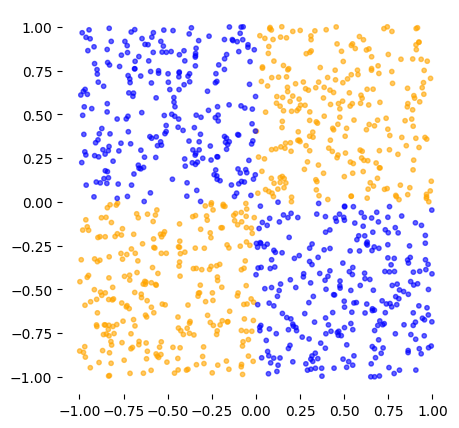

In [7]:
# 데이터 포인트 개수
num_points = 1000

# 무작위 데이터 생성 (XOR 패턴)
x1 = np.random.uniform(-1, 1, num_points)
x2 = np.random.uniform(-1, 1, num_points)

# XOR 기반 레이블 생성
labels = (x1 * x2) > 0  # 같은 부호이면 1, 다르면 0

# 색상 설정
colors = np.where(labels, 'orange', 'blue')

# 플롯 생성
plt.figure(figsize=(5, 5))
plt.scatter(x1, x2, c=colors, s=10, alpha=0.6)
plt.gca().set_frame_on(False)  # 테두리 제거
plt.show()

In [8]:
X = np.column_stack((x1, x2))
y = labels

label 0의 비율 49.9%

Accuracy score: 1.0
Accuracy score: 0.973
Accuracy score: 0.501


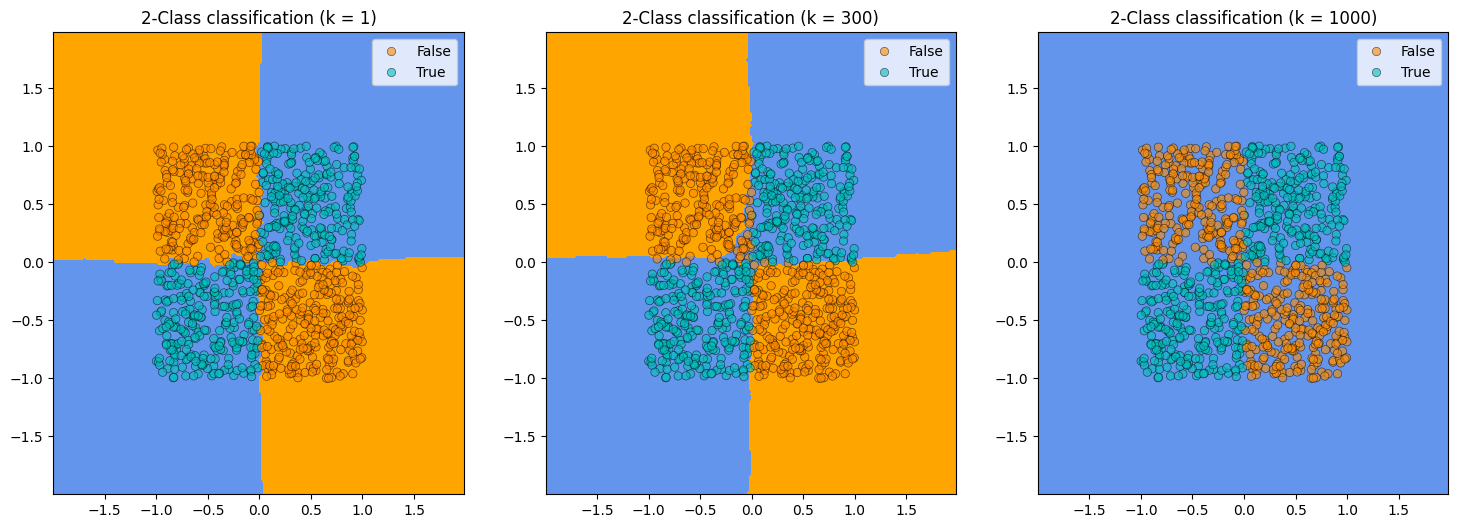

In [11]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score


h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

neighbors_list = [1, 300, 1000]

print(f'label 0의 비율 {sum(y == 0) / len(y)*100}%\n')

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, n_neighbors in enumerate(neighbors_list):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ##### Accuracy #####
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)  # Calculate accuracy using predictions on original data
    print(f"Accuracy score: {accuracy}")

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1],
                    hue=y,
                    palette=cmap_bold, alpha=0.6,
                    edgecolor="black", ax=axes[i])

    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())
    axes[i].set_title("2-Class classification (k = %i)" % (n_neighbors))


plt.show()

Best parameters: {'n_neighbors': 22}
Accuracy score: 0.982


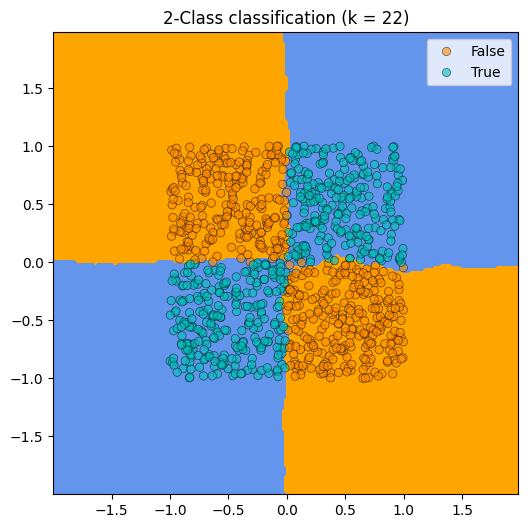

In [16]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Define the parameter distribution for RandomizedSearchCV
param_dist = {'n_neighbors': randint(1, 1001)} #n_neighbors를 1부터 1000까지 무작위로 선택

# Create a KNeighborsClassifier
knn = neighbors.KNeighborsClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(knn,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=3, random_state=42)

# Fit the randomized search to the data
random_search.fit(X, y)

# Get the best estimator and its parameters
best_knn = random_search.best_estimator_
best_params = random_search.best_params_

print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions and calculate accuracy
y_pred = best_knn.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy score: {accuracy}")


# Plot the decision boundary for the best estimator
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=0.6, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2-Class classification (k = {best_params['n_neighbors']})")
plt.show()

In [17]:

for i in range(2):
    # Define the parameter distribution for RandomizedSearchCV
    param_dist = {'n_neighbors': randint(1, 1001)} #n_neighbors를 1부터 1000까지 무작위로 선택
    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(knn,
                                    param_distributions=param_dist,
                                    n_iter=50,
                                    cv=3, random_state=42)

    # Fit the randomized search to the data
    random_search.fit(X, y)

    # Get the best estimator and its parameters
    best_knn = random_search.best_estimator_
    best_params = random_search.best_params_

    print(f"Best parameters: {best_params}")
    y_pred = best_knn.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy score: {accuracy}")

Best parameters: {'n_neighbors': 22}
Accuracy score: 0.982
Best parameters: {'n_neighbors': 22}
Accuracy score: 0.982


In [22]:
# prompt: Best parameters와 Accuracy score 를 사전형으로 리스트에 저장하고 데이터프레임으로 만들어다오

import pandas as pd
from tqdm import tqdm

# Define the parameter distribution for RandomizedSearchCV
param_dist = {'n_neighbors': randint(1, 1001)}
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(knn,
                                    param_distributions=param_dist,
                                    n_iter=50,
                                    cv=3, random_state=42)

result = []
for i in tqdm(range(10)):
    # Fit the randomized search to the data
    random_search.fit(X, y)

    # Get the best estimator and its parameters
    # best_knn = random_search.best_estimator_
    best_params = random_search.best_params_

    y_pred = best_knn.predict(X)
    accuracy = accuracy_score(y, y_pred)

    result.append({'Best parameters': best_params, 'Accuracy score': accuracy})

df = pd.DataFrame(result)
df

100%|██████████| 10/10 [00:40<00:00,  4.08s/it]


,Best parameters,Accuracy score
0,{'n_neighbors': 22},0.982
1,{'n_neighbors': 22},0.982
2,{'n_neighbors': 22},0.982
3,{'n_neighbors': 22},0.982
4,{'n_neighbors': 22},0.982
5,{'n_neighbors': 22},0.982
6,{'n_neighbors': 22},0.982
7,{'n_neighbors': 22},0.982
8,{'n_neighbors': 22},0.982
9,{'n_neighbors': 22},0.982


In [23]:
# prompt: randomforest로 훈련과 검증데이터로 나누고 하이퍼파라미터 튜닝해줘

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 데이터 분할 (훈련 및 검증 데이터)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier 모델 생성
rf_classifier = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 분포 정의
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=50,  # 반복 횟수
    cv=5,  # 교차 검증 폴드 수
    scoring='accuracy',  # 평가 지표
    n_jobs=-1,  # 모든 CPU 코어 사용
    random_state=42,
    verbose=1
)

# 하이퍼파라미터 튜닝 수행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print("Best hyperparameters:", random_search.best_params_)
print("Best accuracy score:", random_search.best_score_)

# 최적의 모델로 검증 데이터 예측
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'max_depth': 48, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 156}
Best accuracy score: 0.99375
Validation Accuracy: 0.995


100%|██████████| 100/100 [00:49<00:00,  2.04it/s]


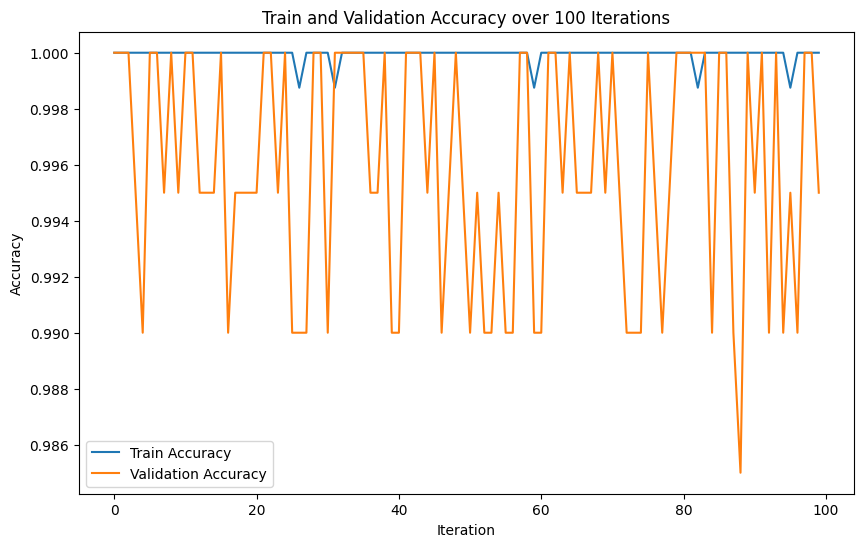

In [24]:
# prompt: best_rf_model를 활용하여 훈련과 검증데이터의 정확도를 100번 모의실험여 100개의 accuracy의 결과를 시각화 해다오

import numpy as np
import matplotlib.pyplot as plt

# 빈 리스트 생성
train_accuracies = []
val_accuracies = []

for _ in tqdm(range(100)):  # 100번 반복
    # 훈련 및 검증 데이터 분할 (매번 다른 random_state로 분할)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0,1000))

    # best_rf_model을 사용하여 훈련 데이터 학습
    best_rf_model.fit(X_train, y_train)

    # 훈련 데이터에 대한 예측 및 정확도 계산
    y_train_pred = best_rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # 검증 데이터에 대한 예측 및 정확도 계산
    y_val_pred = best_rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

In [26]:
# prompt: train_accuracies = []
# val_accuracies = [] 데이터프레임으로 보여줘

import pandas as pd

# Assuming train_accuracies and val_accuracies are already defined as lists
# from the previous code execution.

# Create a DataFrame
df_accuracies = pd.DataFrame({'Train Accuracy': train_accuracies, 'Validation Accuracy': val_accuracies})

# Display the DataFrame
df_accuracies


,Train Accuracy,Validation Accuracy
0,1.00000,1.000
1,1.00000,1.000
2,1.00000,1.000
3,1.00000,0.995
4,1.00000,0.990
...,...,...
95,0.99875,0.995
96,1.00000,0.990
97,1.00000,1.000
98,1.00000,1.000


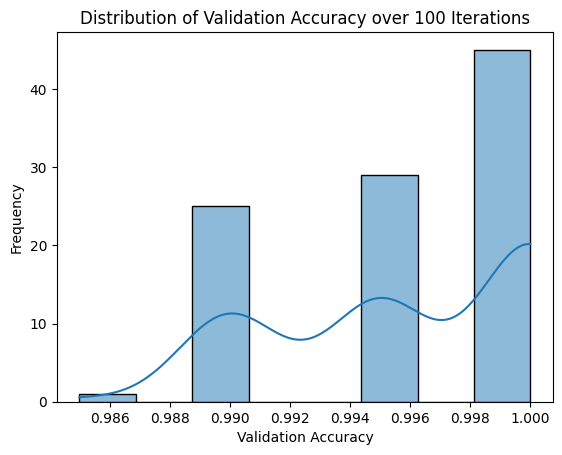

In [29]:
# prompt: Validation Accuracy를 histogram으로
# Assuming val_accuracies is defined from the previous code execution.
sns.histplot(val_accuracies, kde=True)  # Use seaborn's histplot for a cleaner look
plt.xlabel('Validation Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Validation Accuracy over 100 Iterations')
plt.show()
